In [1]:
from clean2 import *
from analyze import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_turnstiles, df_ampm = data_wrangling()

In [3]:
df_ampm

,C/A,UNIT,SCP,STATION,ZIPCODE,ZIPCODE_AGI,DATE,AMPM,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,TMP_ENTRIES,TMP_EXITS
1,A006,R079,00-00-00,5 AV/59 ST,10019,8005583.0,11/02/2019,PM,Saturday,4098923,7058586,11/02/2019,4097957.0,7057072.0,966.0,966.0
2,A006,R079,00-00-00,5 AV/59 ST,10019,8005583.0,11/03/2019,AM,Sunday,4099092,7058848,11/02/2019,4098923.0,7058586.0,169.0,169.0
3,A006,R079,00-00-00,5 AV/59 ST,10019,8005583.0,11/03/2019,PM,Sunday,4099979,7060287,11/03/2019,4099092.0,7058848.0,887.0,887.0
4,A006,R079,00-00-00,5 AV/59 ST,10019,8005583.0,11/04/2019,AM,Monday,4100128,7061222,11/03/2019,4099979.0,7060287.0,149.0,149.0
5,A006,R079,00-00-00,5 AV/59 ST,10019,8005583.0,11/04/2019,PM,Monday,4101641,7063433,11/04/2019,4100128.0,7061222.0,1513.0,1513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270438,S102,R165,00-05-01,TOMPKINSVILLE,10304,1515252.0,12/25/2019,PM,Wednesday,511,0,12/25/2019,510.0,0.0,1.0,1.0
270439,S102,R165,00-05-01,TOMPKINSVILLE,10304,1515252.0,12/26/2019,AM,Thursday,511,0,12/25/2019,511.0,0.0,0.0,0.0
270440,S102,R165,00-05-01,TOMPKINSVILLE,10304,1515252.0,12/26/2019,PM,Thursday,514,0,12/26/2019,511.0,0.0,3.0,3.0
270441,S102,R165,00-05-01,TOMPKINSVILLE,10304,1515252.0,12/27/2019,AM,Friday,514,0,12/26/2019,514.0,0.0,0.0,0.0


In [4]:
df_daily = calculate_total_daily_traffic(df_ampm)

df_daily[df_daily["STATION"] == "34 ST-PENN STA"].head()

,STATION,DATE,DAY_NAME,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC


### Here we have identified top 10 most trafficked stations based on total daily traffic

In [5]:
top_stations = (df_daily
     .groupby(["STATION"], as_index=False)
     .sum()
     .sort_values("DAILY_TRAFFIC", ascending=False))

top_stations_name = list(top_stations.STATION[:10])
top_stations_name

['34 ST-HERALD SQ',
 '23 ST',
 '14 ST-UNION SQ',
 'TIMES SQ-42 ST',
 'CANAL ST',
 '14 ST',
 '96 ST',
 '72 ST',
 'CHAMBERS ST',
 '50 ST']

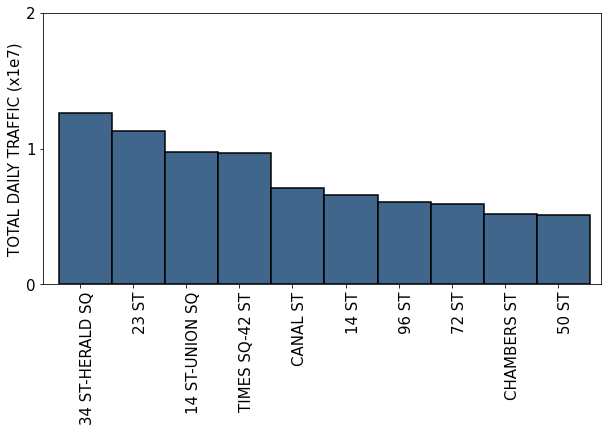

In [6]:
data_to_plot = top_stations[["STATION", "DAILY_TRAFFIC"]][:10]
data_to_plot["DAILY_TRAFFIC"] = data_to_plot["DAILY_TRAFFIC"]/1e7

y_label = "TOTAL DAILY TRAFFIC (x1e7)"
fontsize= 15
x_rot_ticklabel = 90
x_lim=(-0.7, 9.8)

plt.subplots(figsize=(10,5))
# plt.gcf().subplots_adjust(bottom=0.15)

handle = sns.barplot(x = 'STATION',y='DAILY_TRAFFIC',
                     data=data_to_plot, 
                     color=(0.2, 0.4, 0.6, 0.6),
                     edgecolor=(0,0,0),
                     linewidth=1.5)

plt.yticks(np.arange(0, 3))

set_axis(handle,
         y_label=y_label, 
         fontsize=fontsize, 
         rot_xticklabels=x_rot_ticklabel,
         x_lim=x_lim)

plt.savefig("../figures/total_daily_traffic_for_top_10_stations.svg", dpi=300, bbox_inches='tight')

### Here we calculated average daily traffic across all the top 10 most trafficked stations over the entire  selected period

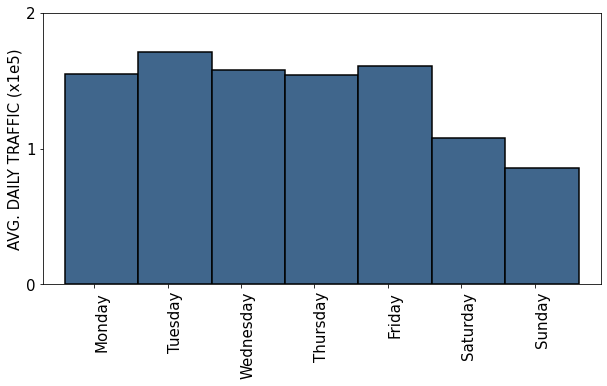

In [7]:
# calculate daily traffic based on daily entries and daily exits (not total here) 
df_daily
mask = generate_mask_for_top_stations(top_stations, top_stations_name, df_daily)
t = df_daily[mask].groupby(["DAY_NAME"]).mean() 
t = sort_by_day_name(t)
data_to_plot = t[["DAY_NAME2", "DAILY_TRAFFIC"]]
data_to_plot["DAILY_TRAFFIC"] = data_to_plot["DAILY_TRAFFIC"]/1e5

y_label = "AVG. DAILY TRAFFIC (x1e5)"
fontsize = 15
x_rot_ticklabel = 90
x_lim = (-0.7, 6.9)

plt.subplots(figsize=(10,5))

handle = sns.barplot(x = 'DAY_NAME2',y='DAILY_TRAFFIC',
                     data=data_to_plot, 
                     color=(0.2, 0.4, 0.6, 0.6),
                     edgecolor=(0,0,0),
                     linewidth=1.5)

plt.yticks(np.arange(0, 3))

set_axis(handle,
         y_label=y_label, 
         fontsize=fontsize, 
         rot_xticklabels=x_rot_ticklabel,
         x_lim=x_lim,
         horizontal_alignment="left",
         )

plt.savefig("../figures/avg_daily_traffic_overall.svg", dpi=300, bbox_inches='tight')

### Here we calculated daily average traffic across all the top 10 stations over the entire selected period

In [8]:
df_daily2 = calculate_daily_traffic_ampm(df_ampm)
df_daily2

,STATION,DATE,DAY_NAME,AMPM,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,103 ST,11/02/2019,Saturday,PM,14992.0,14992.0,29984.0
1,103 ST,11/03/2019,Sunday,AM,3039.0,3039.0,6078.0
2,103 ST,11/03/2019,Sunday,PM,14702.0,14702.0,29404.0
3,103 ST,11/04/2019,Monday,AM,6147.0,6147.0,12294.0
4,103 ST,11/04/2019,Monday,PM,24835.0,24835.0,49670.0
...,...,...,...,...,...,...,...
23523,ZEREGA AV,12/25/2019,Wednesday,PM,598.0,598.0,1196.0
23524,ZEREGA AV,12/26/2019,Thursday,AM,596.0,596.0,1192.0
23525,ZEREGA AV,12/26/2019,Thursday,PM,1433.0,1433.0,2866.0
23526,ZEREGA AV,12/27/2019,Friday,AM,649.0,649.0,1298.0


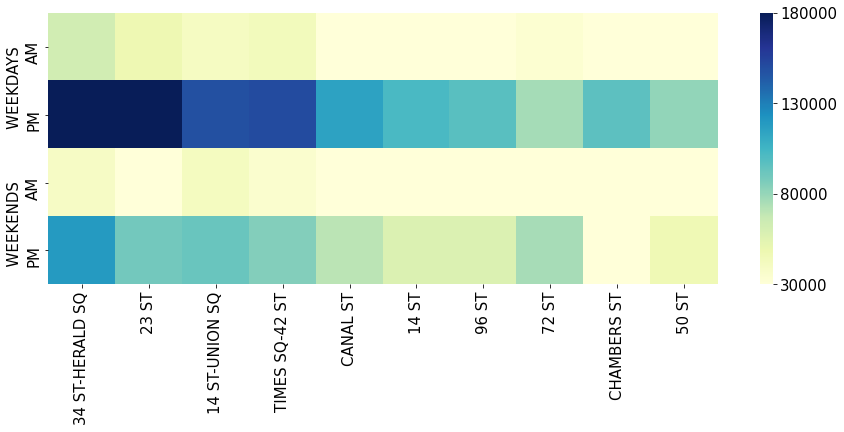

In [9]:
t_wkd_am, t_wkd_pm, t_wke_am, t_wke_pm = calculate_weekly_traffic_ampm_for_top_stations(top_stations, top_stations_name, df_daily2)

data_to_plot = np.zeros((4, len(top_stations_name)))
data_to_plot[0,:] = t_wkd_am["DAILY_TRAFFIC"].to_numpy()
data_to_plot[1,:] = t_wkd_pm["DAILY_TRAFFIC"].to_numpy()
data_to_plot[2,:] = t_wke_am["DAILY_TRAFFIC"].to_numpy()
data_to_plot[3,:] = t_wke_pm["DAILY_TRAFFIC"].to_numpy()

xticklabels = top_stations_name
yticklabels = ["AM", "PM","AM", "PM"]
y_label = "  WEEKENDS           WEEKDAYS     "
fontsize= 15
x_rot_ticklabel = 90

plt.subplots(figsize=(15,5))

handle = sns.heatmap(data_to_plot,cmap= "YlGnBu",
                annot=False,
                xticklabels=xticklabels, 
                yticklabels=yticklabels,
                vmin=3e4, vmax=0.18e6);

set_axis(handle,
         y_label=y_label, 
         fontsize=fontsize, 
         rot_xticklabels=x_rot_ticklabel,
         horizontal_alignment='center'
        )
cbar = handle.collections[0].colorbar
cbar.set_ticks(list(range(30000, 200000, 50000)))
cbar.ax.tick_params(labelsize=fontsize)
plt.savefig("../figures/weekly_ampm_average_traffic.svg", dpi=300, bbox_inches='tight')